In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#  pipline  ===>>>> conatainer  ======>>>>> step of  process continous  flow  
# the  output  of  first step  will  be  input  of  second  step and output  of second  step  will  be  input  of  input  of  third  step 

In [2]:
# in column transformer  in  1 step  output will  not  make  input  of  scond  second  step(2 step) 

In [1]:
import  numpy as  np  
import  pandas  as  pd  
df=  pd.read_csv('covid_toy.csv') 
df.head(2)

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes


In [2]:
x=df.drop(columns=['has_covid'])
y=df['has_covid']

In [3]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2,random_state=42)


In [4]:
numeric_col =  x.select_dtypes(include=['number']).columns.tolist()
categoric_col  =  x.select_dtypes(include=['category','object']).columns.tolist()

In [5]:
from sklearn.impute import  SimpleImputer
from sklearn.preprocessing import  StandardScaler 
from sklearn.preprocessing  import  OneHotEncoder
from  sklearn.pipeline  import  Pipeline


In [6]:
numeric = Pipeline(steps=[
    ('si',SimpleImputer(strategy='mean')),
    ('std',StandardScaler())
])
categoric =  Pipeline(steps=[
    ('si_c',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

In [7]:
#   column transformer  
from  sklearn.compose import ColumnTransformer  
preprocessor  =  ColumnTransformer(transformers=[
    ('num',numeric,numeric_col),
    ('cate',categoric,categoric_col)
])

In [8]:
from sklearn.linear_model  import  LogisticRegression
clf =  Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',LogisticRegression())
])

In [9]:
clf.fit(x_train,y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cate', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [10]:
y_pred =  clf.predict(x_test)

In [11]:
# accurecy  test 
from  sklearn.metrics import  accuracy_score  
accuracy_score(y_test,y_pred)

0.45

In [12]:
#  complete  case  analysis  =====>>>> data missing  values  5% less  ===>>>>drop  =====>>>> data performance not effect
#  if data missing values more then  5%  ====>>>  fill  missing  data.

In [12]:
df.isnull().mean()*100

age           0.0
gender        0.0
fever        10.0
cough         0.0
city          0.0
has_covid     0.0
dtype: float64

In [13]:
# sir  nay liyaa  20 %  instead of 5%  why ?
# ans :- sir show  how  to  takle  if  value arew  under  5% but  here  no 5% any  column  so  sir  increase range for teaching  purpose  
# but  we  only  use  5%  in  industry  always  its  down side  just example  

cols=[var  for  var in  df.columns if  df [var].isnull().mean() <0.20 and df [var].isnull().mean() >0] 
cols

['fever']

In [1]:
df[cols].sample(5)

NameError: name 'df' is not defined

In [15]:
len(df[cols].dropna())/len(df)

0.9

In [17]:
new_df = df[cols].dropna()
df.shape,new_df.shape 

((100, 6), (90, 1))


     ---------------------------------------- 0.0/52.8 kB ? eta -:--:--
     ------- -------------------------------- 10.2/52.8 kB ? eta -:--:--
     ------- -------------------------------- 10.2/52.8 kB ? eta -:--:--
     ------- -------------------------------- 10.2/52.8 kB ? eta -:--:--
     ------- -------------------------------- 10.2/52.8 kB ? eta -:--:--
     ------- -------------------------------- 10.2/52.8 kB ? eta -:--:--
     ------- -------------------------------- 10.2/52.8 kB ? eta -:--:--
     ---------------------- ---------------- 30.7/52.8 kB 72.9 kB/s eta 0:00:01
     ---------------------- ---------------- 30.7/52.8 kB 72.9 kB/s eta 0:00:01
     ---------------------- ---------------- 30.7/52.8 kB 72.9 kB/s eta 0:00:01
     --------------------------------------- 52.8/52.8 kB 94.0 kB/s eta 0:00:00
     ---------------------------------------- 0.0/116.4 kB ? eta -:--:--
     --------- --------------------------- 30.7/116.4 kB 640.0 kB/s eta 0:00:01
     -----------


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import  matplotlib.pyplot as plt 

Matplotlib is building the font cache; this may take a moment.


<Axes: >

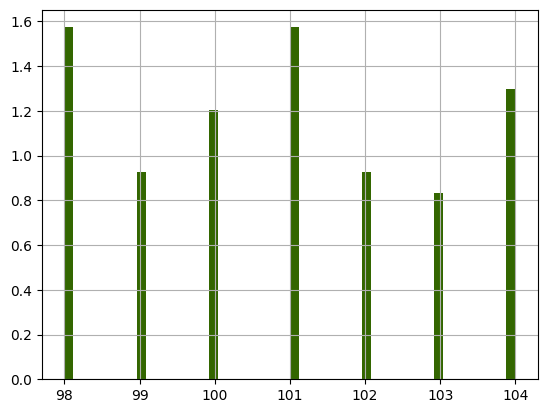

In [36]:
fig  = plt.figure()
ax=  fig.add_subplot(111)
df['fever'].hist(bins=50,ax=ax,density=True,color='red') 
new_df['fever'].hist(bins=50,ax=ax,density=True,color='green',alpha=0.8)

#  use  deee  both  overlap  so  drop  not  aaafect  our  data much  
# Ask 3 simple questions:

# 🔹 Are peaks at same location?

# 🔹 Is spread (left–right width) similar?

# 🔹 Is skewness direction same?

# If YES to all → shape is similar
# If NO to any → shape changed


In [ ]:
# what is function transformer in machine learning ?

# The FunctionTransformer is a tool in scikit-learn, 
# a popular Python library for machine learning, that allows you to apply a specified function to the input data. 
# The FunctionTransformer can be useful for performing custom transformations of input data in a machine learning pipeline.

# The FunctionTransformer takes as input a single function that will be applied to each sample in the data. 
# This function can be any Python function that takes a single argument, such as a lambda function or a user-defined function. 
# The function should return the transformed sample.

In [43]:
# function  transformer :-  
# data ====>>>>> custom  logice  =====>>>>>> function  transformer 
from  sklearn.preprocessing import  FunctionTransformer
# create dataset  
x=np.array([[1,2],[3,4]])

#define a customm  scaling  function  
def my_scaling(x):
    return x/np.max(x)
    
# create a  function transformer  to  apply  the  functional  custom function  
custom_transformer =  FunctionTransformer(my_scaling) #  we  can  also  writte  pre defined  function  

# apply  the transformer  to  the  input data  
x_transformed =  custom_transformer.transform(x)

# view the  transformed  data  
print(x_transformed)

[[0.25 0.5 ]
 [0.75 1.  ]]
